Author: Audrey
(beginning date:2022/10/11, end date: 2022/10/11)

### Introduction

I will continue to do the sub-question "Do people have preferences about which week do more activities in a month?" that assigned to me on different datasets (participant2).

##### External Libraries:

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##### Read data in 

In [46]:
p2 = pd.read_csv("D:/university/s2/3406/2022-DATA3406-RE06-Group04/src/resources/Participant-02-detail.csv")

The 2nd data has been saved in varible p2.

##### Data cleaning

Check how many null values are contained in the data

In [47]:
p2.isnull().sum().sum()

0

As the above result showed, there is no null value in the dataset. Then, we will keep the conlumns that we need and convert the string to Datatimes.After that, the data will be grouped by date firstly.

In [48]:
# only keep columns that we need
data = pd.DataFrame({"Date": p2['Date'], "Count":p2['Count']})
# convert type of date to datatiimes 
data['Date'] = pd.to_datetime(data['Date'])
# group data by date
per_day_data =  data.groupby(['Date']).sum()
per_day_data

,Count
Date,
2021-10-08,41
2021-12-31,36
2022-01-01,22332
2022-01-02,23324
2022-01-03,8887
...,...
2022-08-28,17600
2022-08-29,13363
2022-08-30,17756


As we can see from above table, all data has been grouped by date and the 'count' column represents the total number of steps per day. Also, data type of the "Date" column has been changed to datetime. 

For the next step, there are two actions need to be done. The first thing is convert data seriers index to data column, and the second thing is group data by week.

In [49]:
# convert data seriers index to data column
per_day_data.reset_index(inplace=True)
# group per_day data by week.
weekly_data = per_day_data.resample('W', on="Date").sum()
weekly_data

,Count
Date,
2021-10-10,41
2021-10-17,0
2021-10-24,0
2021-10-31,0
2021-11-07,0
2021-11-14,0
2021-11-21,0
2021-11-28,0
2021-12-05,0


Now, the data has been aggreated by week and the data is stored in varibale weekly_data.

However, as above table showed, there are too many missing values in 2021, in order to show the result more clearly, we delate the data in 2021.

In [50]:
weekly_data = weekly_data['2022']

C:\Users\18089\AppData\Local\Temp/ipykernel_8272/3643311849.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  weekly_data = weekly_data['2022']


The current weekly_data only keeps the data in 2022.

In order to do the further action, we need to convert data type of "Date" to datetimes. Also, the month and the date of begining of each week has been extracted and there are two new columns to store these two information.

In [51]:
weekly_data.reset_index(inplace=True)
weekly_data['month'] = pd.DatetimeIndex(weekly_data['Date']).month
weekly_data['date_of_the_beginning_of_the_week'] = pd.DatetimeIndex(weekly_data['Date']).day
weekly_data

C:\Users\18089\AppData\Local\Temp/ipykernel_8272/699169849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_data['month'] = pd.DatetimeIndex(weekly_data['Date']).month
C:\Users\18089\AppData\Local\Temp/ipykernel_8272/699169849.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_data['date_of_the_beginning_of_the_week'] = pd.DatetimeIndex(weekly_data['Date']).day


,Date,Count,month,date_of_the_beginning_of_the_week
0,2022-01-02,45692,1,2
1,2022-01-09,118019,1,9
2,2022-01-16,115127,1,16
3,2022-01-23,119082,1,23
4,2022-01-30,100066,1,30
5,2022-02-06,91408,2,6
6,2022-02-13,76244,2,13
7,2022-02-20,99547,2,20
8,2022-02-27,82305,2,27
9,2022-03-06,63805,3,6


As above tabled showed, we successfuly convert seriers index to data column and two new conlumns have existed.
After that, weeks that with the max steps count in each month has been selected, which saved in varibale group_data.

In [52]:
group_data = weekly_data.groupby(['month']).max(['Count'])
group_data

,Count,date_of_the_beginning_of_the_week
month,,
1,119082,30
2,99547,27
3,124428,27
4,101214,24
5,106251,29
6,136940,26
7,105891,31
8,116310,28
9,63897,4


After the last aggreation, the final step we need to do is visulise the result.

<AxesSubplot:xlabel='date_of_the_beginning_of_the_week', ylabel='Count'>

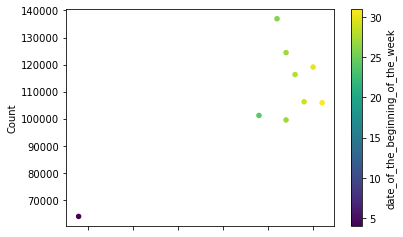

In [55]:
ax = group_data.plot.scatter(x="date_of_the_beginning_of_the_week", y="Count", c="date_of_the_beginning_of_the_week", colormap='viridis')
ax

The x-ase reprsents the date of begining the week, y-ase represents the total number of step counts, coulour represents the date of the begining of a week. Since all most points in the scatter plot are very light, which menas participants always do more exercises at the end of month.

#### Conclusion

We can find that partucipant2 also do more exercises at the last or the first week of month, which completely same with the participant5.